In [3]:
import numpy as np
import matplotlib.pyplot as plt

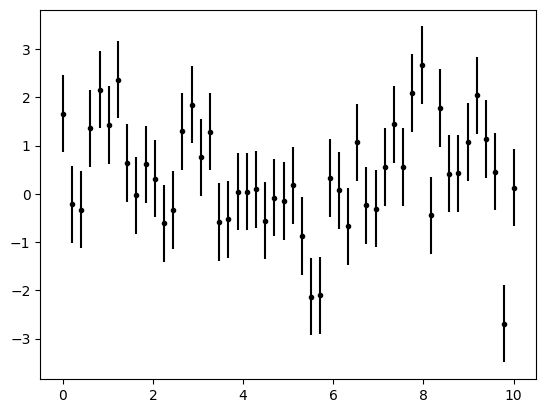

In [4]:
# use via errorbar
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt=".k");

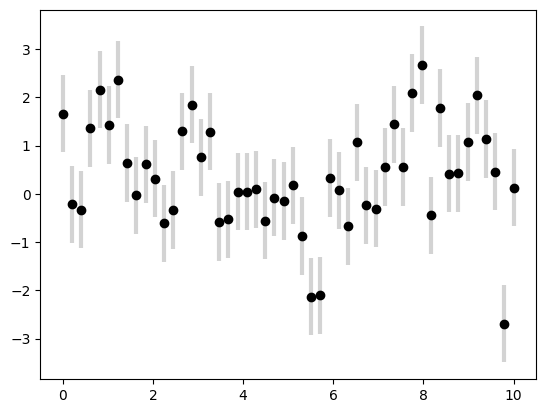

In [5]:
plt.errorbar(
    x, y, yerr=dy, fmt="o", color="black", ecolor="lightgray", elinewidth=3, capsize=0
);

### continuous quantities with many values

In [15]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Define the kernel function
kernel = ConstantKernel(1.0, (1e-1, 1e3)) * RBF(10, (1e-3, 1e3))

# Compute the Gaussian process fit
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 150)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * sigma  # 2*sigma ~ 95% confidence region

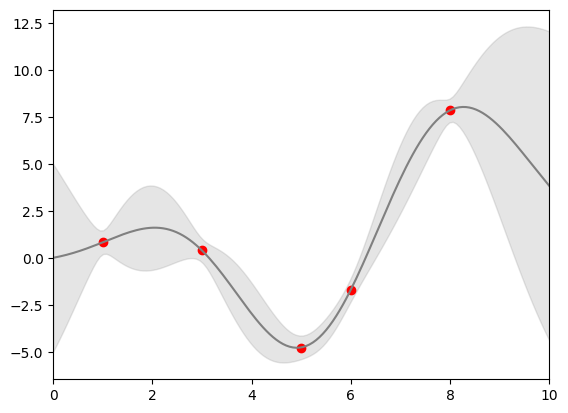

In [16]:
# Visualize the result
plt.plot(xdata, ydata, "or")
plt.plot(xfit, yfit, "-", color="gray")
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color="gray", alpha=0.2)
plt.xlim(0, 10);

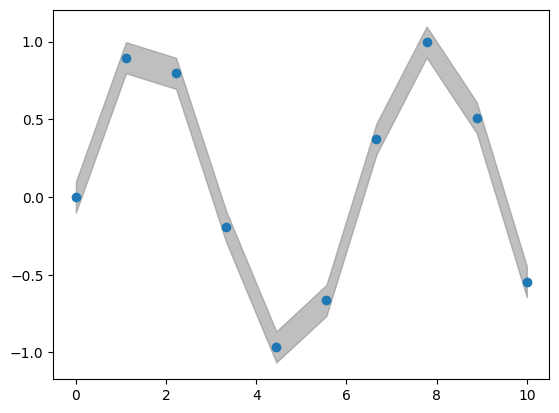

In [22]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.plot(x, y, "o")
plt.fill_between(x, y - 0.1, y + 0.1, color="gray", alpha=0.5)